In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_csv(r'..\..\data\raw\Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [4]:
# Get all unique label combinations from the "Finding Labels" column
unique_label_combinations  = df['Finding Labels'].unique()

# Split each row's label combination into a list of individual labels
individual_labels_per_row = [labels.split('|') for labels in list(df['Finding Labels'])]

In [5]:
label_binarizer  = MultiLabelBinarizer()
binary_label_matrix  = label_binarizer.fit_transform(individual_labels_per_row)

In [6]:
unique_labels = list(label_binarizer.classes_)
print(unique_labels)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [7]:
binary_label_matrix

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(112120, 15))

In [8]:
# Create a new DataFrame from the binary label matrix
binary_label_df = pd.DataFrame(binary_label_matrix)
binary_label_df = binary_label_df.set_axis(unique_labels, axis=1)
binary_label_df.insert(0, "Image Path", value=df["Image Index"])
binary_label_df.columns = binary_label_df.columns.str.lower().str.replace(' ', '_')
binary_label_df.head()

,image_path,atelectasis,cardiomegaly,consolidation,edema,effusion,emphysema,fibrosis,hernia,infiltration,mass,no_finding,nodule,pleural_thickening,pneumonia,pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
# saving the preprocssed file
df.to_csv(r'..\..\data\interim\data_entry_preprocessed.csv', index=False)

# Sanket's Code

import os
import cv2
from PIL import Image

In [10]:
import pandas as pd

In [19]:
# get the path/directory
folder_dir = "Dataset/images"
for images in os.listdir(folder_dir):
 
    # Reading the image from the present directory
    image = cv2.imread(f"Dataset/images/{images}")
    
    # The initial processing of the image
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    # tileGridSize -> Number of tiles in the row and column
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(10, 10))
    final_img = clahe.apply(image_bw)

    # Adjust the brightness of the output
    final_img = cv2.add(final_img, 5)
    
    #Saving the image in seperate folder
    im = Image.fromarray(final_img) 
    image_path = "Dataset/IMAGE"
    im.save(f"{image_path}/{images}")
print("Task Completed")

Task Completed


In [12]:
df = pd.read_csv(r"C:\Users\sanke\OneDrive\Desktop\healthcare-ai-project\data\raw\labels.csv", index_col=0)
df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Path,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
def total_instances():
    
    total_data = []

    for i in unique_labels:
        total = df[i].value_counts()[1]
        total_data.append(total)

    return total_data

In [18]:
total_data = total_instances()

In [20]:
total_data

[np.int64(11559),
 np.int64(2776),
 np.int64(4667),
 np.int64(2303),
 np.int64(13317),
 np.int64(2516),
 np.int64(1686),
 np.int64(227),
 np.int64(19894),
 np.int64(5782),
 np.int64(60361),
 np.int64(6331),
 np.int64(3385),
 np.int64(1431),
 np.int64(5302)]

In [22]:
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 60361 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


In [25]:
def show_plot():
    total_data = []
    for i in unique_labels:
        total = df[i].value_counts()[1]
        total_data.append(total)

    ax = pd.DataFrame({'li': unique_labels, 'total_data': total_data})
    fig = sns.barplot(x = "li", y = "total_data",data = ax)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title("Counts")
    plt.xticks(rotation = 90)
    plt.show(fig)

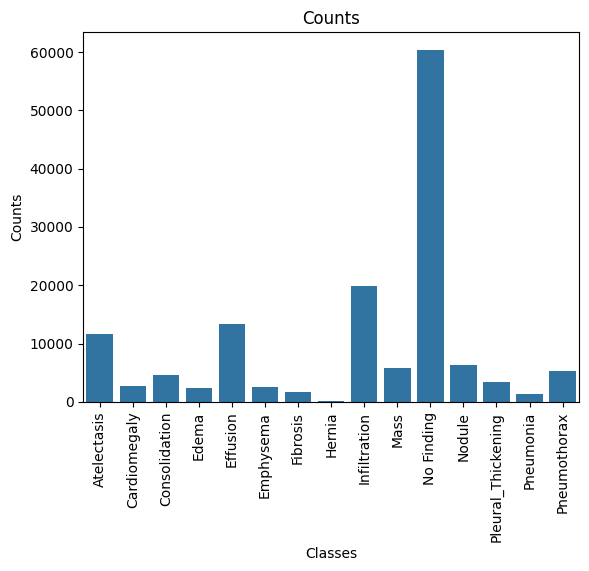

In [26]:
show_plot()

As you can see in the above bar chart that the dataset is highly imbalanced as the No Finding class contains 60361 images which is about 53% of the whole dataset whereas Hernia contains only 227 images. And this imbalanced dataset further result in a high biased model predictions and poor performance on minority classes. So it is very important to first balance the dataset with the help of techniques like UnderSampling & Oversampling to make it balance then proceed for training.

# Undersampling

To balance the classes I will first randomly remove some rows of certain classes to achieve balance in the dataset.

No Finding

60,361 - 5,000 = 55361

In [29]:
a = (df[df["No Finding"] == 1].sample(55361).index)
list(a)
len(a)

55361

In [31]:
for i in a:
    df.drop(index = i, inplace=True)

In [32]:
df.shape, df["No Finding"].value_counts()


((56759, 15),
 No Finding
 0    51759
 1     5000
 Name: count, dtype: int64)

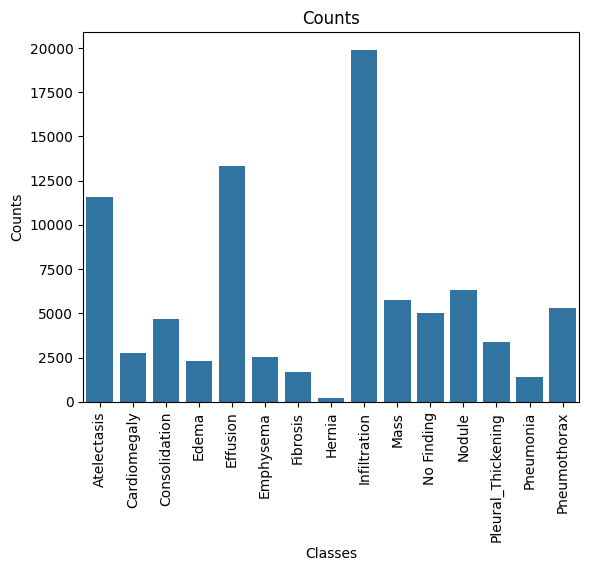

In [33]:
show_plot()


So here the total rows for "No Finding" has dropped to 5000. Now, its time to balance next class.



### Infilteration

In [34]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{unique_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 5000 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


19894 - 5000 = 14894



In [35]:
a = (df[df["Infiltration"] == 1].sample(14894).index)
print(list(a))

['00013328_004.png', '00025590_000.png', '00001577_001.png', '00014410_001.png', '00019464_005.png', '00022267_003.png', '00005881_003.png', '00025581_000.png', '00004381_026.png', '00025227_007.png', '00028873_018.png', '00009551_009.png', '00012364_038.png', '00005806_007.png', '00015530_123.png', '00007425_000.png', '00016986_006.png', '00027461_000.png', '00004737_004.png', '00018839_000.png', '00015175_000.png', '00004007_022.png', '00027726_027.png', '00030299_000.png', '00019643_006.png', '00027331_000.png', '00000131_000.png', '00022707_012.png', '00027441_006.png', '00019201_009.png', '00025139_001.png', '00009502_000.png', '00014888_019.png', '00018360_011.png', '00005271_005.png', '00027443_000.png', '00023162_018.png', '00019475_006.png', '00002306_000.png', '00026810_028.png', '00030053_001.png', '00020429_009.png', '00013648_022.png', '00009621_004.png', '00015029_008.png', '00021572_002.png', '00026606_000.png', '00022815_010.png', '00027967_001.png', '00029778_001.png',

In [36]:
for i in a:
    df.drop(index = i, inplace=True)

NameError: name 'n_df' is not defined